In [ ]:
import pandas as pd
import numpy as np
import math
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing  import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score, classification_report

Preprocessing the dataframe

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
# filling NaN cells of these columns with the mode since all these features are discrete features
df['WindGustDir'] = df['WindGustDir'].fillna("W")
df['WindDir9am'] = df['WindDir9am'].fillna("N")
df['WindDir3pm'] = df['WindDir3pm'].fillna("SE")

FileNotFoundError: ignored

In [ ]:
def get_null_cols():
  for col in df.columns:
    print(f'{col} : {df[col].isnull().sum()}')

Solving the wind direction and speed into north and east based components

In [ ]:
directions = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE'] #possible directions with 'E' as 0 degrees
angles = []
degree = 0
for i in range(0, len(directions)):
  angles.append(degree)
  degree+=22.5
dir_ang_dict = dict(zip(directions, angles)) #making the map of direction and its corresponding angle in degrees
hor_speeds_gust = []
ver_speeds_gust =[]

hor_speeds_9am = []
ver_speeds_9am =[]

hor_speeds_3pm = []
ver_speeds_3pm =[]
for index in range(0, len(df)):
    angle = dir_ang_dict[df.iloc[index][7]]
    ver_speed = math.cos(angle*math.pi/180.0) * df.iloc[index]['WindGustSpeed'] # converting degrees to radians and resolving into East-West component 
    hor_speed = math.sin(angle*math.pi/180.0) * df.iloc[index]['WindGustSpeed'] # converting degrees to radians and resolving into North-South component 
    hor_speeds_gust.append(hor_speed)
    ver_speeds_gust.append(ver_speed)
    angle = dir_ang_dict[df.iloc[index]['WindDir9am']]
    ver_speed = math.cos(angle*math.pi/180.0) * df.iloc[index]['WindSpeed9am']
    hor_speed = math.sin(angle*math.pi/180.0) * df.iloc[index]['WindSpeed9am']
    hor_speeds_9am.append(hor_speed)
    ver_speeds_9am.append(ver_speed)
    angle = dir_ang_dict[df.iloc[index]['WindDir3pm']]
    ver_speed = math.cos(angle*math.pi/180.0) * df.iloc[index]['WindSpeed3pm']
    hor_speed = math.sin(angle*math.pi/180.0) * df.iloc[index]['WindSpeed3pm']
    hor_speeds_3pm.append(hor_speed)
    ver_speeds_3pm.append(ver_speed)



Using the new DataFrame for EDA and Models now


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS-noDir.csv")


In [ ]:
rain_y = []
for index in range(0, len(df)-1):
  rain_y.append(df.loc[index+1, 'Rainfall'])
print(rain_y)
print(df.columns)

[0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, 2.2, 15.6, 3.6, 0.0, 0.0, 16.8, 10.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.6, 6.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2, 0.0, 5.8, 3.0, 11.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.6, 12.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.4, 6.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 21.0, 3.2, 4.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.2, 0.8, 0.0, 0.0, 0.0, 0.0, 1.2, 1.4, 4.8, 8.0, 0.0, 0.2, 14.4, 4.6, 2.0, 5.6, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0

In [ ]:
print(len(df))
df.drop(labels=[len(df)-1], axis = 0, inplace = True)
print(len(df))
df['Target Rainfall'] = rain_y
print(df.shape)
print(df.columns)

142141
142140
(142140, 18)
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'WindSpeedNorth', 'WindSpeedEast', 'WindSpeedNorth9am',
       'WindSpeedEast9am', 'WindSpeedNorth3pm', 'WindSpeedEast3pm',
       'Target Rainfall'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train = df.sample(frac = 0.8, random_state = 42)
df_test = df.drop(df_train.index, axis = 0)
mms = MinMaxScaler()
mms = mms.fit(df_train)
df_train = pd.DataFrame(mms.transform(df_train))
mins = mms.data_min_
maxs = mms.data_max_
i=0 
for col in df.columns:
  df_test[col] = (df_test[col]-mins[i])/(maxs[i]-mins[i])
  i+=1
print(df_test.head(10))
print(df_train.head(10))

     MinTemp   MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
5   0.544811  0.652174  0.000718         0.55         0.23     0.475166   
14  0.431604  0.614367  0.000000         0.50         0.28     0.544702   
15  0.533019  0.485822  0.000000         0.69         0.82     0.524834   
16  0.518868  0.523629  0.060345         0.80         0.65     0.418874   
18  0.431604  0.574669  0.000000         0.45         0.26     0.640728   
20  0.603774  0.714556  0.000000         0.38         0.28     0.548013   
26  0.674528  0.708885  0.000000         0.56         0.15     0.408940   
28  0.495283  0.548204  0.004310         0.78         0.70     0.415563   
29  0.483491  0.551985  0.002874         0.48         0.28     0.423841   
36  0.580189  0.826087  0.000000         0.34         0.12     0.438742   

    Pressure3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  WindSpeedNorth  \
5        0.4528  0.596567  0.658349        0.0           0.0        0.600000   
14       0.531

In [ ]:
df_train.columns = df_test.columns
print(df_train.head(5))

    MinTemp   MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
0  0.653302  0.606805  0.000000         0.58         0.52     0.615894   
1  0.424528  0.327032  0.012213         0.94         0.81     0.471854   
2  0.422170  0.404537  0.000000         0.86         0.44     0.581126   
3  0.634434  0.521739  0.051724         0.87         0.70     0.475166   
4  0.415094  0.340265  0.012931         1.00         0.94     0.415563   

   Pressure3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  WindSpeedNorth  \
0       0.6256  0.680258  0.591171        0.0           0.0        0.576923   
1       0.4784  0.377682  0.335893        1.0           0.0        0.603846   
2       0.5920  0.403433  0.412668        0.0           0.0        0.519231   
3       0.5536  0.603004  0.506718        1.0           1.0        0.519231   
4       0.4240  0.429185  0.347409        1.0           1.0        0.407692   

   WindSpeedEast  WindSpeedNorth9am  WindSpeedEast9am  WindSpeedNorth3pm  \
0   

In [ ]:
cols = df.columns

x_train = df_train.drop(['Target Rainfall'], axis = 1)
y_train = pd.DataFrame(df_train['Target Rainfall'])

x_test = df_test.drop( ['Target Rainfall'], axis = 1)
print(len(x_test.columns))
y_test = pd.DataFrame(df_test['Target Rainfall'])
print(x_train.columns)
print(y_train)

17
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'WindSpeedNorth', 'WindSpeedEast', 'WindSpeedNorth9am',
       'WindSpeedEast9am', 'WindSpeedNorth3pm', 'WindSpeedEast3pm'],
      dtype='object')
        Target Rainfall
0              0.000000
1              0.001617
2              0.000000
3              0.008086
4              0.008625
...                 ...
113707         0.010782
113708         0.000000
113709         0.006469
113710         0.000000
113711         0.000000

[113712 rows x 1 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Standard Scaling the dataframe

In [ ]:
standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(x_train)

x_train = pd.DataFrame(standard_scaler.transform(x_train))

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(x_test.columns))
i = 0
for col in x_test.columns:
  x_test[col] = (x_test[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(x_test.describe())

16
            MinTemp       MaxTemp      Rainfall   Humidity9am   Humidity3pm  \
count  28428.000000  28428.000000  28428.000000  28428.000000  28428.000000   
mean      -0.002154      0.002012     -0.004877      0.006943      0.004512   
std        1.001976      0.993610      1.051029      0.994535      0.994653   
min       -3.190627     -3.793704     -0.280476     -3.567515     -2.442376   
25%       -0.718215     -0.733405     -0.280476     -0.623575     -0.701652   
50%       -0.029695     -0.087654     -0.280476      0.059839      0.023650   
75%        0.737066      0.712516     -0.208546      0.743253      0.652245   
max        3.084293      3.379749     44.196689      1.636949      2.344615   

        Pressure9am   Pressure3pm       Temp9am       Temp3pm     RainToday  \
count  28428.000000  28428.000000  28428.000000  28428.000000  28428.000000   
mean       0.009532      0.008426      0.002101      0.002822     -0.006138   
std        1.000446      1.001213      0.996975 

In [ ]:

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(x_test.columns))
i = 0
for col in x_test.columns:
  x_test[col] = (x_test[col] - means[i])/math.sqrt(vars[i])
  y_test[col] = (y_test[col] - )
  i+=1
# print(x_test.describe())
print(y_test)

16
        Target Rainfall
5                   0.0
14                  0.0
15                 16.8
16                 10.6
18                  0.0
...                 ...
142110              0.4
142114              0.0
142116              0.0
142117              0.0
142123              0.0

[28428 rows x 1 columns]


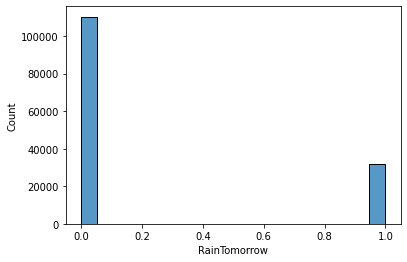

In [ ]:
sns.histplot(df['RainTomorrow'])

In [ ]:
#Correlation heatmap
plt.figure(figsize = (16,6))
trgt = df['RainTomorrow']
df = df.drop(columns = ['RainTomorrow'], index = 1)
df.insert(loc = 16, column = 'RainTomorrow', value = trgt)

<Figure size 1152x432 with 0 Axes>

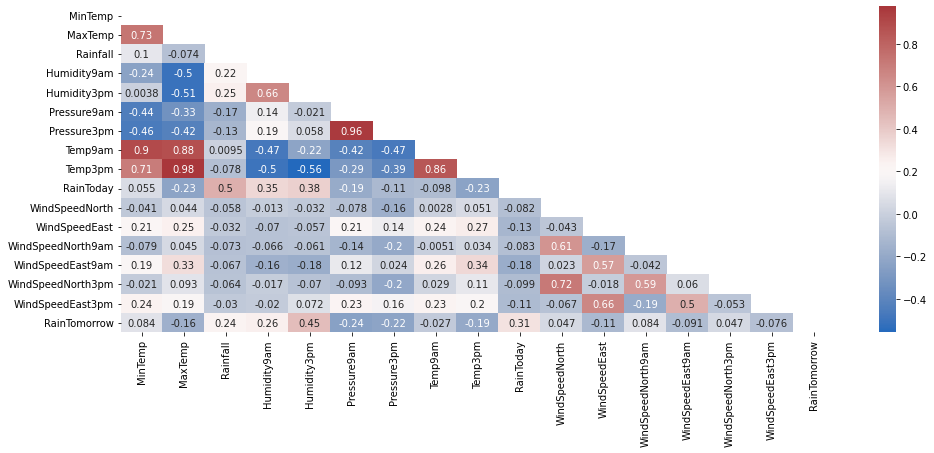

In [ ]:
plt.figure(figsize = (16,6))
masker = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap = 'vlag', mask = masker)


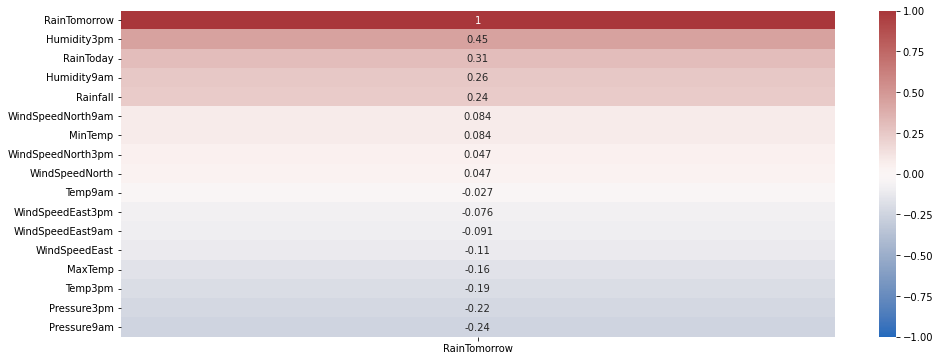

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(df.corr()[['RainTomorrow']].sort_values(by = 'RainTomorrow', ascending = False), cmap = 'vlag', vmin = -1, annot = True)

Applying Random Forest:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


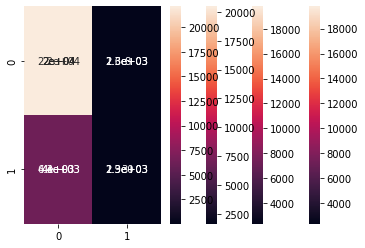

In [ ]:
precs = []
accs = []
depths = []
for depth in range(3,7):
  depths.append(depth)
  rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = depth, random_state = 950)
  y_pred = rfc.fit(x_train, np.ravel(y_train)).predict(x_test)
  precs.append(precision_score(y_test, y_pred))
  accs.append(accuracy_score(y_test, y_pred))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

0.7894736842105263


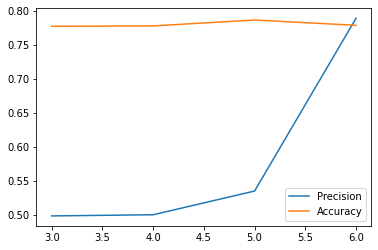

In [ ]:
sns.lineplot(x=depths, y=precs, label = "Precision")
sns.lineplot(x=depths, y=accs, label = "Accuracy")
print(precs[-1])

OUTLIERS

In [ ]:
print(df['MinTemp'].mean())
ss = StandardScaler()
ss = ss.fit(df)
df = pd.DataFrame(ss.transform(df))
i = 0
print(cols)
df.columns = cols
print(df['MinTemp'].mean())


12.186980533414005
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'WindSpeedNorth', 'WindSpeedEast', 'WindSpeedNorth9am',
       'WindSpeedEast9am', 'WindSpeedNorth3pm', 'WindSpeedEast3pm'],
      dtype='object')
-4.4789771511460435e-17


IndexError: ignored

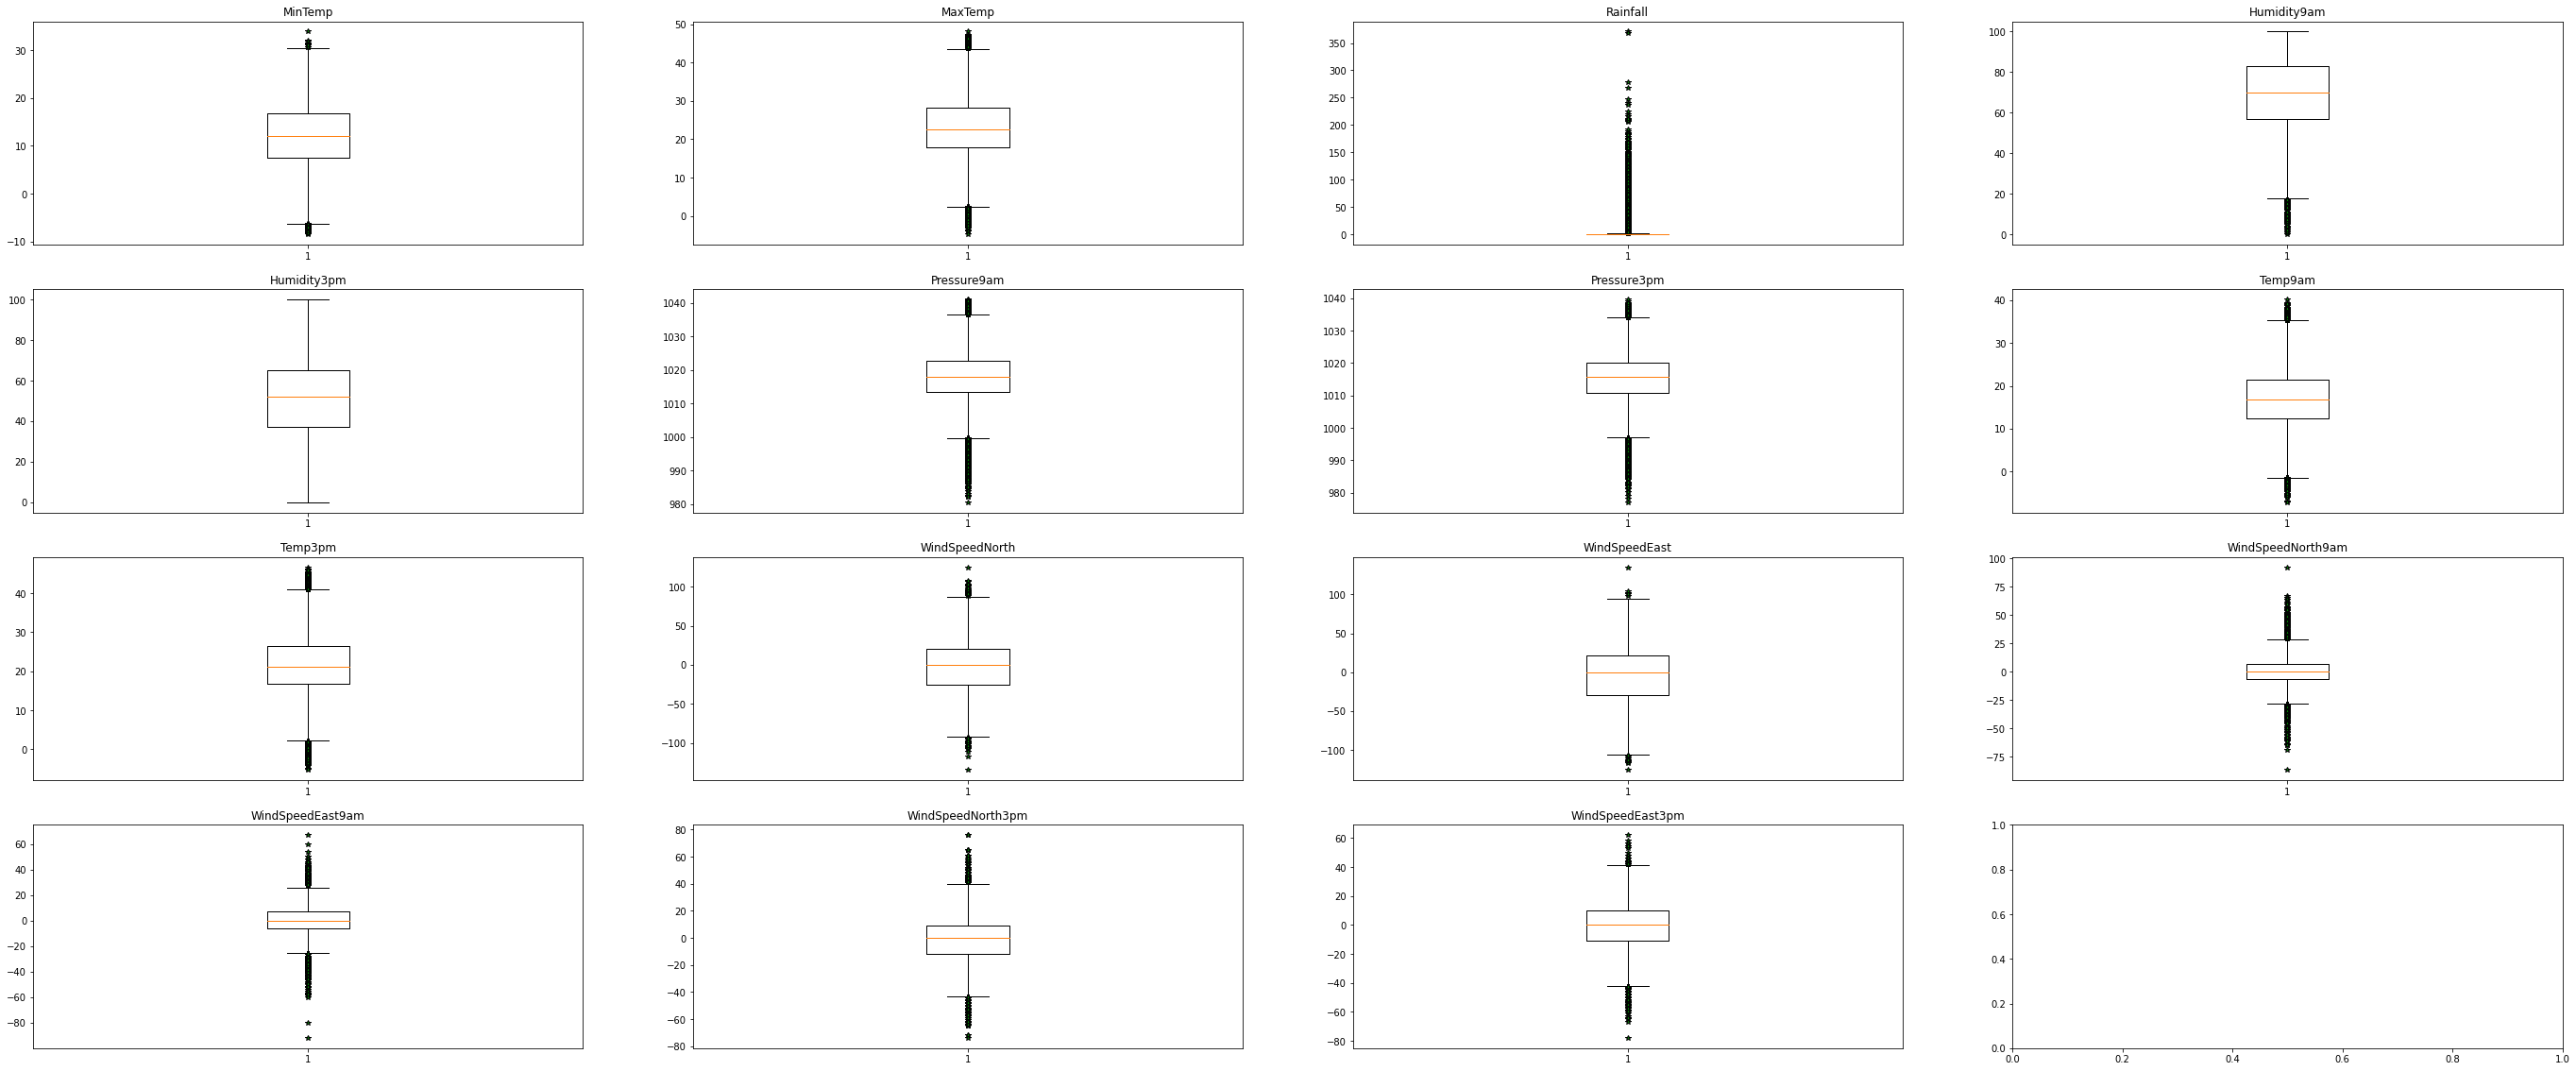

In [ ]:
outlier_color = dict(markerfacecolor = 'green', markeredgecolor = 'black', marker = '*')
figure, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (48,20))
df=df.drop(columns = ['RainTomorrow','RainToday'],inplace=False)
for i, axis in enumerate(axes.flat):
  axis.boxplot(df.iloc[:, i], flierprops = outlier_color)
  axis.set_title(df.columns[i])
plt.tight_layout()
df['Rainfall'].describe()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

# we have to do linear regression on the variables with pCA and w/o pCA
# Do decision tree regressor and use it to find the amount of rainfall on next day. 
lr = LinearRegression()
lr = lr.fit(x_train, y_train)


In [ ]:
print(lr.intercept_)
print(lr.coef_)
print(x_train.head(5))

[-0.00933171]
[[ 0.00245014  0.00591065  0.14770315 -0.00353984  0.01757848  0.040946
  -0.04799916 -0.00323586  0.00442647 -0.00167639  0.02254153 -0.00117768
   0.00397374 -0.00112732  0.00933784 -0.00392446 -0.00303878]]
    MinTemp   MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
0  0.653302  0.606805  0.000000         0.58         0.52     0.615894   
1  0.424528  0.327032  0.012213         0.94         0.81     0.471854   
2  0.422170  0.404537  0.000000         0.86         0.44     0.581126   
3  0.634434  0.521739  0.051724         0.87         0.70     0.475166   
4  0.415094  0.340265  0.012931         1.00         0.94     0.415563   

   Pressure3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  WindSpeedNorth  \
0       0.6256  0.680258  0.591171        0.0           0.0        0.576923   
1       0.4784  0.377682  0.335893        1.0           0.0        0.603846   
2       0.5920  0.403433  0.412668        0.0           0.0        0.519231   
3       0.5536 

In [ ]:
print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train))

0.3096864776998284
0.2973612204763654


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor

In [ ]:
lr = DecisionTreeRegressor()
train_scores, test_scores = validation_curve(lr, x_train, y_train, param_name = 'max_depth', param_range=np.arange(1,11), cv=3, verbose = 1, scoring = 'r2' )
print(test_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[0.2319598  0.25355011 0.2510339 ]
 [0.27720014 0.30185529 0.29101714]
 [0.30744509 0.34083027 0.31754977]
 [0.32178883 0.36413444 0.33684749]
 [0.33204241 0.37038541 0.3348307 ]
 [0.33523597 0.36848909 0.30655002]
 [0.33438487 0.34057815 0.23315988]
 [0.29258863 0.31277507 0.16785084]
 [0.28090959 0.28547671 0.19184489]
 [0.23927975 0.26264381 0.07444473]]


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.3s finished


In [ ]:
rfr = RandomForestRegressor(n_estimators = 50, max_depth = 17, max_features = 'sqrt', verbose = 1, n_jobs = -1)
rfr = rfr.fit(x_train, y_train)


<ipython-input-15-6d139508aba6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = rfr.fit(x_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.42060401981226525


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [ ]:
print(rfr.score(x_train,y_train))
print(rfr.score(x_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8281456488587945
0.42060401981226525


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [ ]:
#MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
df = pd.read_csv("/content/drive/MyDrive/weatherAUS-noDir.csv")

In [ ]:
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'WindSpeedNorth', 'WindSpeedEast', 'WindSpeedNorth9am',
       'WindSpeedEast9am', 'WindSpeedNorth3pm', 'WindSpeedEast3pm'],
      dtype='object')


In [ ]:
mlc = MLPClassifier(hidden_layer_sizes = (128, 64), activation = 'relu', verbose = -1)
